In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn import metrics
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor , KNeighborsClassifier 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold , GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer




[nltk_data] Downloading package words to /Users/Pavani/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
with open('./data/airbnb-listings.csv', encoding='ascii', errors='ignore') as infile:
    df = pd.read_csv(infile, sep=';')
#df = pd.read_csv('./data/airbnb-listings.csv', sep=';')

# EDA

In [3]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11321672,https://www.airbnb.com/rooms/11321672,20170306202425,2017-03-07,Private BR in Artsy Eastside Casa,This awesome eastside abode has a PRIVATE BEDR...,"Adorable, earthy, artsy 3 bedroom, 2 bath mid-...",This awesome eastside abode has a PRIVATE BEDR...,none,"East Side, baby! We are smack dab in the cente...",...,NaN,NaN,NaN,NaN,NaN,strict,2,NaN,"30.3065892184,-97.6726448216","Host Has Profile Pic,Host Identity Verified,Re..."
1,7651087,https://www.airbnb.com/rooms/7651087,20170306202425,2017-03-07,East Central 1950s bungalow,Charming 2-bedroom/ 1 bathroom house close to ...,"Beautiful new front patio for lounging, a full...",Charming 2-bedroom/ 1 bathroom house close to ...,none,The Upper East Side (Windsor Park Neighborhood...,...,10.0,9.0,10.0,NaN,NaN,moderate,1,3.34,"30.3173767676,-97.690462101","Host Is Superhost,Host Has Profile Pic,Host Id..."
2,16884711,https://www.airbnb.com/rooms/16884711,20170306202425,2017-03-07,Pool Oasis in East Austin close to Mueller / SXSW,Artist's desert oasis in East Austin (close to...,NaN,Artist's desert oasis in East Austin (close to...,none,"Walk to Torchy's Tacos, voted the best tacos i...",...,NaN,NaN,NaN,NaN,NaN,moderate,1,NaN,"30.2981724842,-97.6824947663","Host Has Profile Pic,Host Identity Verified,Is..."
3,10649415,https://www.airbnb.com/rooms/10649415,20170306202425,2017-03-07,Charming Cottage 4mi to UT and DT!,Stay in our private/comfy cottage. We live on ...,Come stay in our sweet little cottage and feel...,Stay in our private/comfy cottage. We live on ...,none,We live in a quickly growing neighborhood with...,...,10.0,9.0,10.0,NaN,NaN,strict,2,2.54,"30.2974975727,-97.6789013554","Host Is Superhost,Host Has Profile Pic,Host Id..."
4,10768287,https://www.airbnb.com/rooms/10768287,20170306202425,2017-03-07,Comfortable 3/2 close to SXSW,Less than 5mi from all the SXSW action & a sto...,"Our home is located in Mueller, a new central ...",Less than 5mi from all the SXSW action & a sto...,none,Mueller is central Austin's newest and most fa...,...,10.0,10.0,9.0,NaN,NaN,moderate,2,0.85,"30.293068871,-97.7038769363","Host Has Profile Pic,Host Identity Verified,Is..."


In [4]:
df.shape

(134545, 89)

In [5]:
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

## Data Cleansing

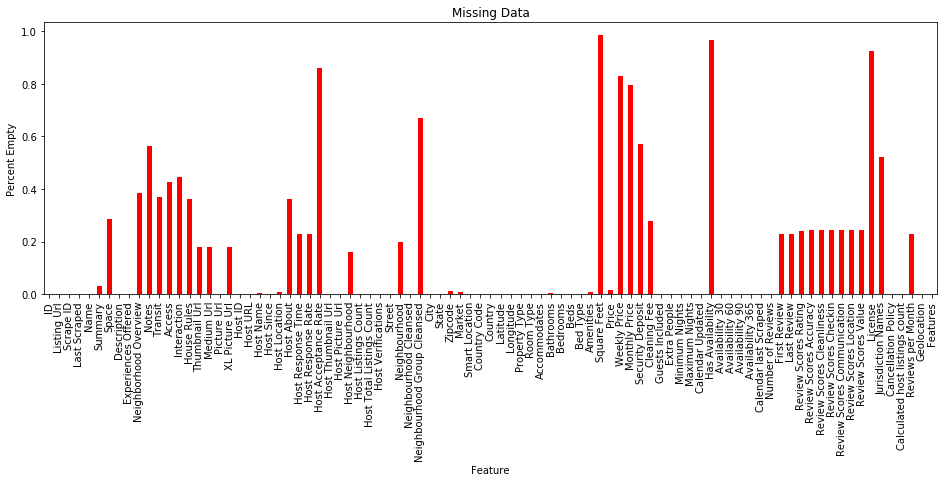

In [6]:
percentage_missing_data = df.isnull().sum() / df.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='red', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty')
ax.set_title('Missing Data')
plt.show()

In [7]:
df.drop(columns = ['Listing Url','Scrape ID', 'Last Scraped','Summary','Space','Neighborhood Overview','Notes','Transit','Access',
                   'Interaction','House Rules','Thumbnail Url','Medium Url', 'Picture Url','XL Picture Url','Host URL',
                   'Host About','Host Response Time','Host Response Rate','Host Acceptance Rate','Host Thumbnail Url',
                   'Host Picture Url','Host Neighbourhood','Neighbourhood','Neighbourhood Group Cleansed','Square Feet',
                   'Weekly Price', 'Monthly Price','Security Deposit','Cleaning Fee','Has Availability','First Review',
                   'Last Review','Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness',
                   'Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value',
                   'License','Jurisdiction Names','Reviews per Month','License','Geolocation'], inplace = True)

In [8]:
df['Room Type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [9]:
df['Property Type'].unique()

array(['House', 'Bungalow', 'Townhouse', 'Apartment', 'Condominium',
       'Guesthouse', 'Serviced apartment', 'Tent', 'Other', 'Boat',
       'Loft', 'Camper/RV', 'Cabin', 'Villa', 'Bed & Breakfast',
       'Earth House', 'Dorm', 'Boutique hotel', 'Timeshare', 'Chalet',
       'Castle', 'Yurt', 'Vacation home', 'In-law', 'Hostel', 'Hut',
       'Treehouse', 'Guest suite', 'Entire Floor', 'Parking Space',
       'Train', 'Lighthouse', 'Island', nan, 'Cave', 'Tipi',
       'Nature lodge', 'Plane', 'Pension (Korea)', 'Casa particular'],
      dtype=object)

In [10]:
df['Neighbourhood Cleansed'].value_counts()

Williamsburg                  3719
Bedford-Stuyvesant            2850
Harlem                        2524
East Village                  2133
Venice                        2085
                              ... 
Bay Terrace, Staten Island       1
Mill Basin                       1
Peralta-Laney                    1
DIA                              1
Tijuana River Valley             1
Name: Neighbourhood Cleansed, Length: 1198, dtype: int64

In [11]:
df['City'].unique()

array(['Austin', 'Lakeway', 'Point Venture', 'West Lake Hills',
       'Manchaca', 'Chicago', 'Chicago, Illinois, US', 'Denver', 'Aurora',
       'San Diego', 'San Francisco', 'La Mesa', 'Mission, San Francisco',
       'Escondido', 'National City', 'Solana Beach', 'Santa Cruz',
       'Scotts Valley', 'Aptos', 'Soquel', 'Aptos Hills-Larkin Valley',
       'Boulder Creek', 'Seattle', nan, 'Washington', 'Washington, D.C.',
       'Sherman Oaks', 'Los Angeles', 'Beverly Hills', 'Signal Hill',
       'South Pasadena', 'Santa Monica', 'Burbank', 'Silver Lake',
       'Temple City', 'Topanga', 'Topanga Canyon', 'Venice Beach',
       'Venice', 'Marina del Rey', 'Malibu', 'Torrance', 'Agoura Hills',
       'Calabasas', 'Valley Glen', 'Van Nuys', 'Walnut', 'West Hollywood',
       'West Covina', 'Westlake Village', 'Whittier', 'Woodland Hills',
       'La Habra', 'New York', 'Manhattan', 'Fort Greene, Brooklyn',
       'Brooklyn', 'Queens', 'Bronx', 'Greenpoint, Brooklyn', 'flushing',
       

In [12]:
df['State'].unique()

array(['TX', 'IL', 'CO', 'CA', 'WA', 'DC', 'NY', 'LA', 'OR', 'TN', 'wa',
       nan, 'ny', 'MA', 'MD', 'MP', 'il', 'ca', 'Ca', 'Il', 'NJ', 'VT'],
      dtype=object)

In [13]:
df['State'].replace({"ny": "NY", "il": "IL","Il":"IL","ca":"CA","Ca":"CA","wa":"WA"}, inplace=True)
   
   

In [14]:
df['State'].value_counts()

CA    49090
NY    40751
TX     9662
DC     7756
LA     5307
IL     5208
WA     3818
MA     3585
OR     3549
TN     3277
CO     2505
MD       31
NJ        1
VT        1
MP        1
Name: State, dtype: int64

In [15]:
df.groupby(['City','State']).size().reset_index().groupby('State')[[0]].max()

,0
State,
CA,19426
CO,2497
DC,7691
IL,5186
LA,5293
MA,3382
MD,8
MP,1
NJ,1


In [16]:
df.loc[df['State'] == 'NY', 'City'] = 'NYC'

In [17]:
values = df['City'].value_counts(dropna=False).keys().tolist()
counts = df['City'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))

value_dict

{'NYC': 40751,
 'Los Angeles': 19426,
 'Austin': 9562,
 'San Francisco': 8679,
 'Washington': 7692,
 'San Diego': 6201,
 'New Orleans': 5293,
 'Chicago': 5186,
 'Seattle': 3812,
 'Portland': 3539,
 'Boston': 3382,
 'Nashville': 3212,
 'Denver': 2497,
 'Oakland': 1609,
 'Long Beach': 1077,
 'Santa Monica': 992,
 'West Hollywood': 939,
 'Pasadena': 588,
 'Marina del Rey': 514,
 'Beverly Hills': 490,
 'Santa Cruz': 451,
 'Malibu': 434,
 'Venice': 409,
 'Rowland Heights': 344,
 'Glendale': 315,
 'Redondo Beach': 312,
 'Burbank': 263,
 'Culver City': 255,
 'Arcadia': 240,
 'Manhattan Beach': 190,
 'Topanga': 180,
 'Inglewood': 178,
 'Torrance': 161,
 'Altadena': 159,
 'Alhambra': 150,
 'San Gabriel': 147,
 'La Jolla': 145,
 'Hermosa Beach': 137,
 'Monterey Park': 132,
 'Walnut': 125,
 'Chula Vista': 118,
 'Aptos': 99,
 'Gardena': 94,
 'Pomona': 91,
 'Santa Clarita': 90,
 'Temple City': 90,
 'El Segundo': 88,
 'Hacienda Heights': 85,
 'Hawthorne': 82,
 'Whittier': 77,
 'Del Mar': 73,
 'North

In [18]:
df1 = df[df['City'].isin(['NYC','Los Angeles','Austin','San Francisco','Washington'])]
df1.shape

(86110, 45)

In [19]:
df1['State'].unique() 

array(['TX', 'CA', 'DC', 'NY', 'MD'], dtype=object)

In [20]:
df1.drop(df1[df1['State'] == 'MD'].index, inplace = True) 

In [21]:
df1['City'].unique()

array(['Austin', 'San Francisco', 'Washington', 'Los Angeles', 'NYC'],
      dtype=object)

Text(0.5, 1.0, 'City Distribution')

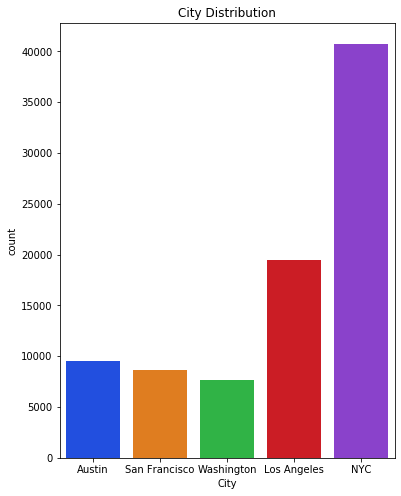

In [22]:
sns.countplot(df1['City'], palette='bright')
fig = plt.gcf()
fig.set_size_inches(6,8)
plt.title('City Distribution')

Text(0.5, 1, 'Room Type Rental Grouping Per City')

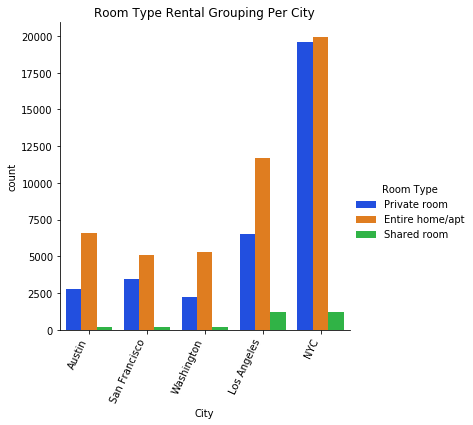

In [23]:
chart = sns.catplot(data=df1, x='City', kind='count',palette='bright', hue="Room Type" ,aspect =1)
chart.set_xticklabels(rotation=65, horizontalalignment='right');
plt.title('Room Type Rental Grouping Per City')

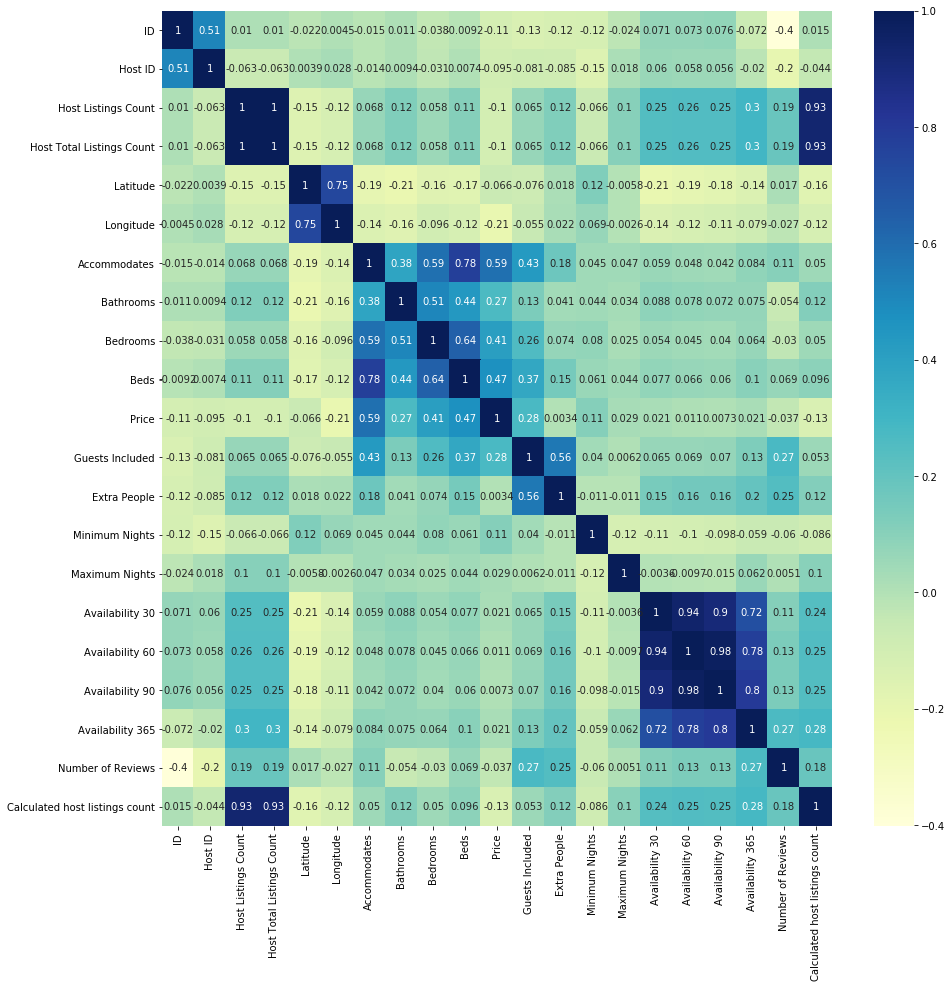

In [24]:
corr = df1.corr(method ='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap="YlGnBu",annot=True)

# Data Visualization

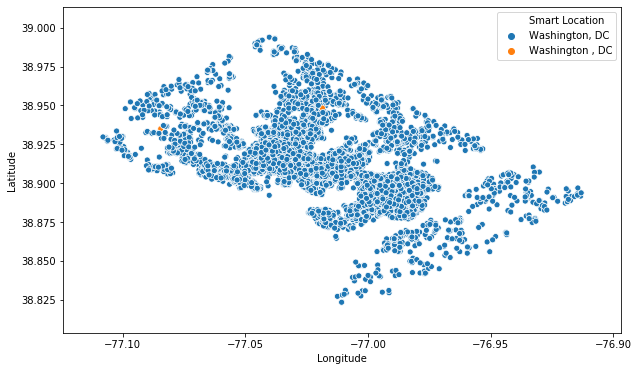

In [25]:
plt.figure(figsize=(10,6))
df_dc = df1[df1['City']=='Washington']
sns.scatterplot(df_dc.Longitude,df_dc.Latitude,hue=df_dc['Smart Location'])
plt.ioff()

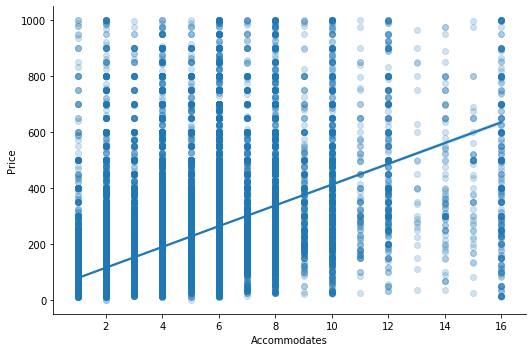

In [26]:
sns.lmplot(x='Accommodates', y='Price', data=df1, aspect=1.5, scatter_kws={'alpha':0.2});

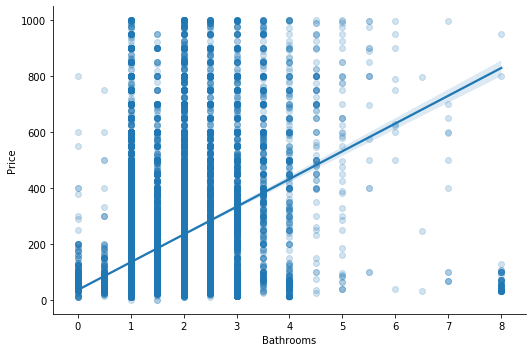

In [27]:
sns.lmplot(x='Bathrooms', y='Price', data=df1, aspect=1.5, scatter_kws={'alpha':0.2});

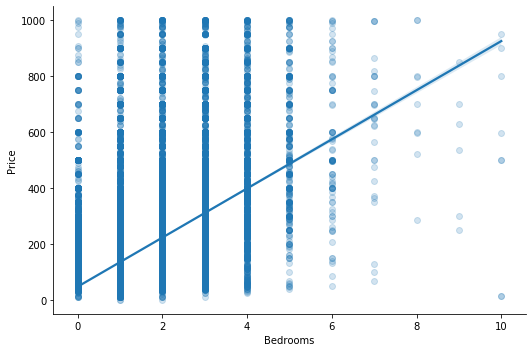

In [28]:
sns.lmplot(x='Bedrooms', y='Price', data=df1, aspect=1.5, scatter_kws={'alpha':0.2});

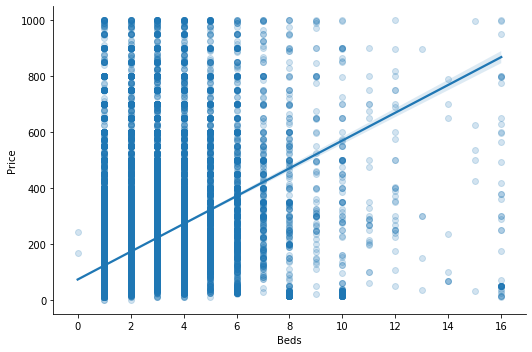

In [29]:
sns.lmplot(x='Beds', y='Price', data=df1, aspect=1.5, scatter_kws={'alpha':0.2});

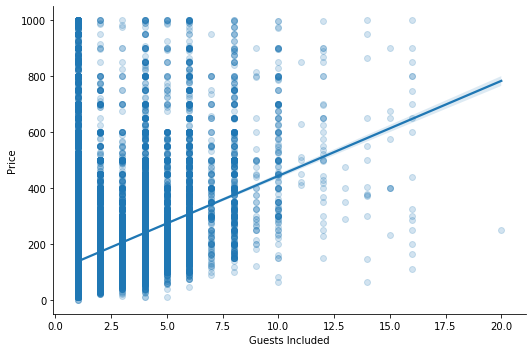

In [30]:
sns.lmplot(x='Guests Included', y='Price', data=df1, aspect=1.5, scatter_kws={'alpha':0.2});

In [31]:
df_price = df1[['Room Type','Accommodates','Bathrooms','Bedrooms','Beds','Bed Type','Price','City','State']]


In [32]:
df_price.shape

(86109, 9)

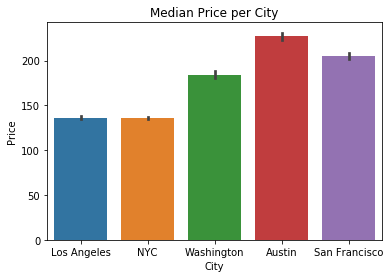

In [33]:
title = 'Median Price per City'
result = df_price.groupby(["City"])['Price'].aggregate(np.median).reset_index().sort_values('Price')
sns.barplot(x='City', y="Price", data=df_price, order=result['City'])
plt.title(title)
plt.ioff()

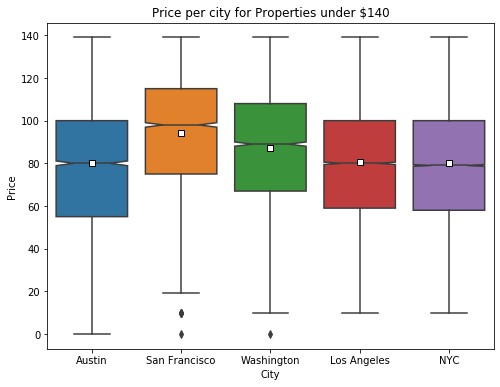

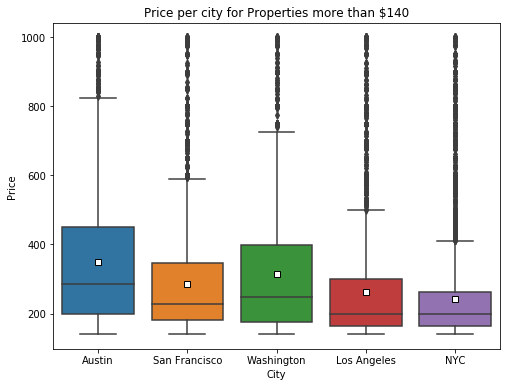

In [34]:
x='City'
y='Price'

title = 'Price per city for Properties under $140'
data_filtered = df_price.loc[df_price['Price'] < 140]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()
f
title = 'Price per city for Properties more than $140'
data_filtered = df_price.loc[df_price['Price'] > 140]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

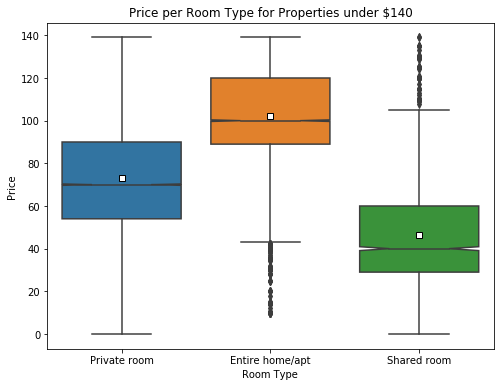

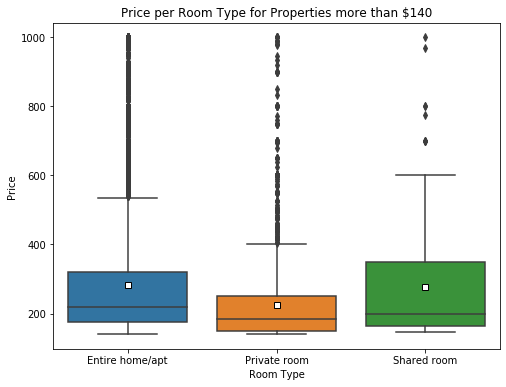

In [35]:
title = 'Price per Room Type for Properties under $140'
data_filtered = df_price.loc[df_price['Price'] < 140]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Room Type', y='Price', data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per Room Type for Properties more than $140'
data_filtered = df_price.loc[df_price['Price'] > 140]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Room Type', y='Price', data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

In [36]:
df_price.isnull().sum()

Room Type          0
Accommodates       0
Bathrooms        314
Bedrooms         115
Beds             164
Bed Type           0
Price           1403
City               0
State              0
dtype: int64

In [37]:
df_price=df_price.dropna(axis=0)

In [38]:
df_price.shape

(84235, 9)

In [39]:
feature_cols = ['Accommodates','Bathrooms','Bedrooms','Beds']

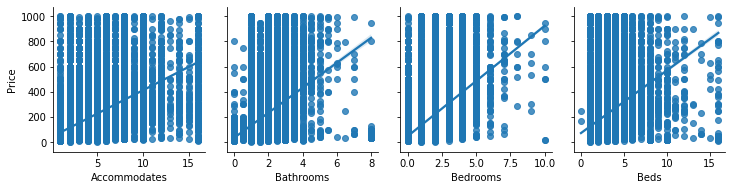

In [40]:
sns.pairplot(df_price, x_vars=feature_cols, y_vars='Price', kind='reg');

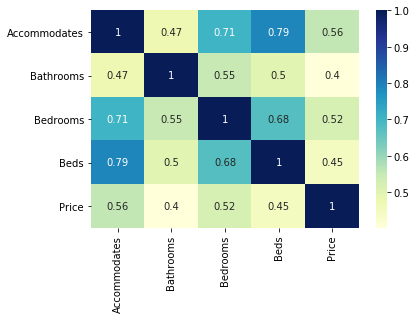

In [41]:
corr = df_price.corr(method ='pearson')
sns.heatmap(corr, cmap="YlGnBu",annot=True)

## Linear Regression

In [42]:
#random.seed(91)
X = df_price[feature_cols]
y = df_price['Price']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 0)
# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict
y_pred = linreg.predict(X_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 111.5325666050237


## Dummies

Dummy variables are hybrid variables used to see if two parameters combined gives us a better value at correlation to the target variable. 

In [44]:
room_dummies = pd.get_dummies(df_price['Room Type'], prefix='Room Type')

In [45]:
room_dummies.sample(n=5, random_state=1)

,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room
106865,1,0,0
23023,0,1,0
123836,0,1,0
81231,1,0,0
67409,1,0,0


In [46]:
price_dummies = pd.concat([df_price, room_dummies], axis=1)
price_dummies.sample(n=5, random_state=1)

,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,City,State,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room
106865,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,150.0,Los Angeles,CA,1,0,0
23023,Private room,2.0,1.0,1.0,1.0,Real Bed,49.0,NYC,NY,0,1,0
123836,Private room,2.0,1.5,1.0,1.0,Real Bed,90.0,Los Angeles,CA,0,1,0
81231,Entire home/apt,3.0,1.0,1.0,1.0,Real Bed,89.0,Los Angeles,CA,1,0,0
67409,Entire home/apt,14.0,3.0,7.0,7.0,Real Bed,363.0,NYC,NY,1,0,0


## Linear Regression

Root Mean Square Error (RMSE) is used for validation of the algorithms across this notebook. RMSE is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are.


In [47]:
features = ['Accommodates','Bathrooms','Bedrooms','Beds']
X = price_dummies[features]
y = price_dummies.Price

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 0)
# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict
y_pred = linreg.predict(X_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))



RMSE: 111.5325666050237


## Feature Engineering

In [49]:
price_dummies['BednBath']= price_dummies['Beds'] * price_dummies['Bathrooms']

In [50]:
features.append('BednBath')
X = price_dummies[features]
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 111.5325666050237


In [51]:
price_dummies['Bedroom * Bath']= price_dummies['Bedrooms'] * price_dummies['Bathrooms']

In [52]:
features.append('Bedroom * Bath')
X = price_dummies[features]
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 111.5325666050237


In [53]:
price_dummies['Accom_beds']= price_dummies['Accommodates'] * price_dummies['Bedrooms']

In [54]:
features.append('Accom_beds')
X = price_dummies[features]
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 111.5325666050237


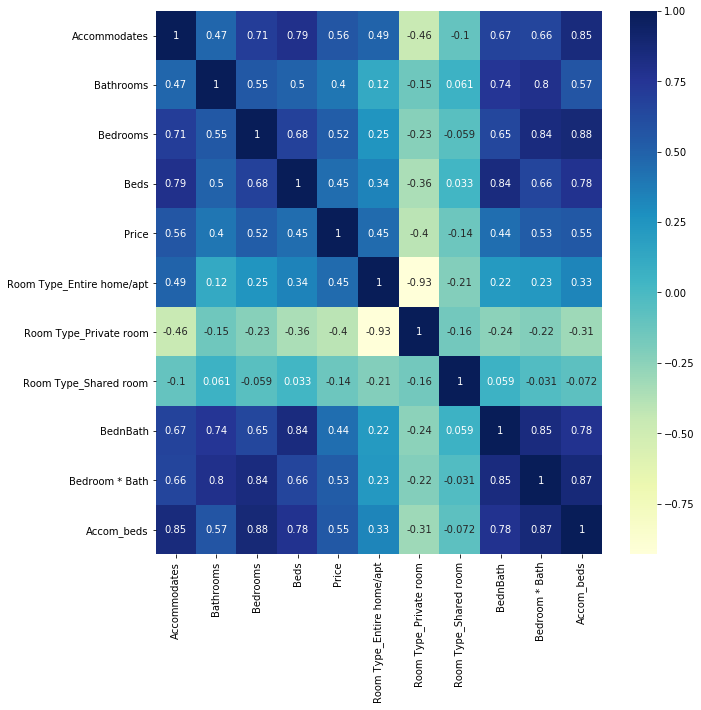

In [55]:
corr = price_dummies.corr(method ='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="YlGnBu",annot=True)

Dummy variables have not shown any significant correlation compared to the acutal variables from the model. So, ignoring the dummy variables for now and sticking to the actual variables. 

## Ridge Regression

In [56]:
X = df_price[feature_cols]
y = df_price['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 91)

In [57]:
ridgereg = Ridge()
ridgereg.fit(X_train, y_train)

y_pred = ridgereg.predict(X_test)

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 109.82041226357555


In [58]:
ridge1 = Ridge(alpha= 0.1)
ridge1.fit(X_train, y_train)

y_pred = ridge1.predict(X_test)

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 109.82042640475518


In [59]:
ridge60 = Ridge(alpha= 60)
ridge60.fit(X_train, y_train)
y_pred = ridge60.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 109.81952440651561


## Lasso Regression

In [60]:
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

109.85191107412685


In [61]:
lasso20 = Lasso(alpha= 20) #, normalize=True
lasso20.fit(X_train, y_train)
y_pred = lasso20.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 113.72514642547354


## K Nearest Neighbors

In [62]:
dfp = df_price._get_numeric_data()
dfp.head()

,Accommodates,Bathrooms,Bedrooms,Beds,Price
0,2.0,1.0,1.0,1.0,62.0
1,6.0,1.0,2.0,2.0,90.0
2,5.0,2.0,3.0,3.0,600.0
3,3.0,1.0,1.0,2.0,65.0
4,8.0,2.0,3.0,5.0,195.0


In [63]:
feature_cols = ['Accommodates','Bathrooms','Bedrooms','Beds']
X = df_price[feature_cols]
y = df_price.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [64]:
knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)


[ 15.  123.9  80.4 ...  80.4  80.4  80.4]


In [65]:
rmse = list()
rmse1 = list()
new = list()
mylist = list(range(50))
mylist = list(filter(lambda x:x%2 != 0, mylist))
for k in mylist:
    knn = KNeighborsRegressor(n_neighbors =k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_pred1 = knn.predict(X_train)
    error = sqrt(mean_squared_error(y_test, y_pred))
    error1 = sqrt(mean_squared_error(y_train, y_pred1))
    rmse.append(error)
    new.append([error,k])
    rmse1.append(error1)
    print('RMSE test val for k = ',k,'is: ',error,'\nRMSE train val for k = ',error1)

RMSE test val for k =  1 is:  152.31031592174688 
RMSE train val for k =  149.97534143697357
RMSE test val for k =  3 is:  121.65073294346908 
RMSE train val for k =  119.4572112527221
RMSE test val for k =  5 is:  113.77711087544934 
RMSE train val for k =  111.52550776254117
RMSE test val for k =  7 is:  111.33761140118844 
RMSE train val for k =  109.46879073746057
RMSE test val for k =  9 is:  111.21836471699719 
RMSE train val for k =  109.22594575694654
RMSE test val for k =  11 is:  110.43899508929009 
RMSE train val for k =  108.73615742828267
RMSE test val for k =  13 is:  109.10228198962628 
RMSE train val for k =  107.15751535399927
RMSE test val for k =  15 is:  108.86389841530914 
RMSE train val for k =  106.90783776419377
RMSE test val for k =  17 is:  108.68408600106606 
RMSE train val for k =  106.8616853078832
RMSE test val for k =  19 is:  108.46636962224147 
RMSE train val for k =  106.55021747097398
RMSE test val for k =  21 is:  108.44712132745916 
RMSE train val f

In [66]:
Rmsetest = min(new)
print("Minimun RMSE-test: ", Rmsetest[0])
Rmsetrain=min(rmse1)
print("Minimun RMSE-train: ", Rmsetrain)
print("Optimal K val : ", Rmsetest[1])

Minimun RMSE-test:  107.58194403938946
Minimun RMSE-train:  106.32199611037234
Optimal K val :  43


Text(0, 0.5, 'RMSE')

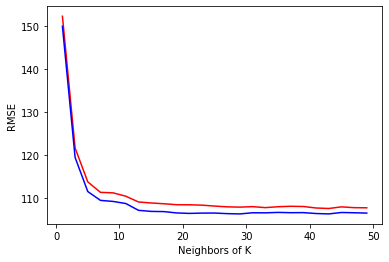

In [67]:
plt.plot(mylist,rmse, color ='red')
plt.plot(mylist, rmse1, color='blue')
plt.xlabel('Neighbors of K')
plt.ylabel('RMSE')

## Grid Search and CV

In [68]:
k_range = list(range(30, 50))
print(k_range)

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [69]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}


In [70]:
clf = KNeighborsClassifier()

In [71]:
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

In [72]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
                                         40, 41, 42, 43, 44, 45, 46, 47, 48,
                                         49]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [73]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.039281872022376395
{'n_neighbors': 48}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=48, p=2,
                     weights='uniform')


In [74]:
clf = KNeighborsClassifier(n_neighbors=49, weights='uniform')

In [75]:
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 11608.572597362685


In [76]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 107.74308607684618


## Decision Trees

In [77]:
feature_cols = ['Accommodates','Bathrooms','Bedrooms','Beds']
X = df_price[feature_cols]
y = df_price['Price']

In [78]:
# list of values to try
max_depth_range = range(1, 9)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE (lower is better)')

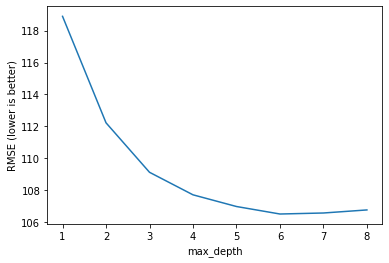

In [79]:
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [80]:
sorted(zip(RMSE_scores, max_depth_range))[0]

(106.49221090253505, 6)

## Random Forests

In [81]:
rfreg = RandomForestRegressor()
rfreg

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [82]:
# list of values to try for n_estimators
estimator_range = range(10, 100, 10)
RMSE_scores = []

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE (lower is better)')

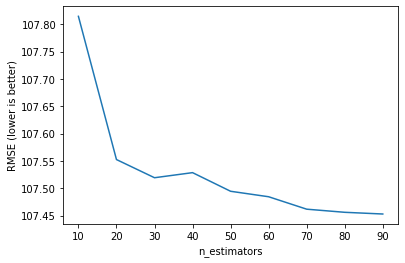

In [83]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

In [84]:
regressor = RandomForestRegressor(n_estimators=65, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [85]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 107.82470550440101


Text(0.5, 0, 'Bathrooms and Bedrooms')

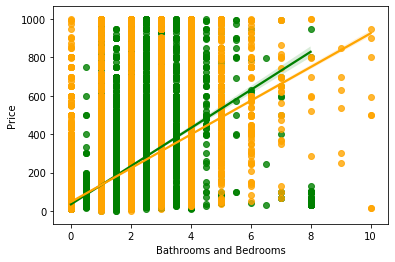

In [86]:
sns.regplot(x=df1['Bathrooms'],y=df1['Price'],color='green')
sns.regplot(x=df1['Bedrooms'],y=df1['Price'],color='orange')
plt.ylabel("Price")
plt.xlabel("Bathrooms and Bedrooms")

As a result of the above plot, we can say that bedrooms are the most important feature in predicting the price.

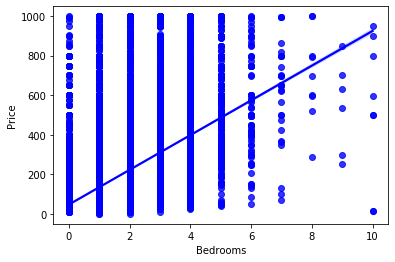

In [87]:
sns.regplot(x=df1['Bedrooms'],y=df1['Price'],color='blue')

## Model Evaluation

A graphical representation of RMSE calculated using different models for comparision purposes. 

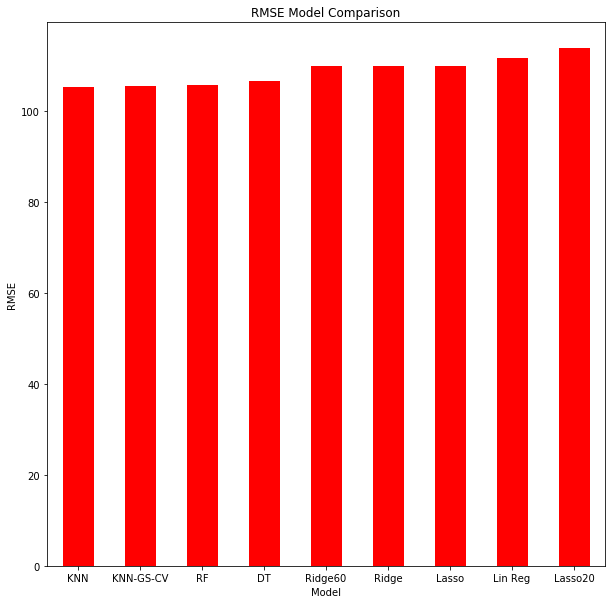

In [88]:
error_val = pd.DataFrame({'error_val':[111.532,109.820,109.819,109.851,113.725,105.199,105.358,106.492,105.662]},
                        index = ['Lin Reg','Ridge', 'Ridge60','Lasso','Lasso20', 'KNN','KNN-GS-CV','DT' ,'RF'])
error_val = error_val.sort_values('error_val')
plt.figure(figsize=(10,10))
ax = error_val.error_val.plot(kind='bar', align = 'center', color='red')
plt.xticks(rotation=0)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Model Comparison')
plt.show()

Conclusion:

As per our observation KNN, KNN with Grid search-CV and Random Forest gives us the best RMSE vaule. While Ridge Regression and Ridge with alpha of 60 are almost the same but a bit better than Linear Regression.Lasso Regression with greater alpha values is performing bad in comparision to Linear Regression and Lasso with and alpha of zero.